In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the data
data_import = pd.read_csv('attacks.csv', encoding='latin-1')

In [3]:
# Take a look at data
data_import.head(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2017.06.11,2017-06-11,2017.0,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,Paul Goff,M,...,N,08h30,"White shark, 4 m","WA Today, 6/11/2017",2017.06.11-Goff.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.11,2017.06.11,6095.0
1,2017.06.10.b,2017-06-10,2017.0,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,female,F,...,N,15h45,7 gill shark,NaN,2017.06.10.b-Flinders.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.b,2017.06.10.b,6094.0
2,2017.06.10.a,2017-06-10,2017.0,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,Bryan Brock,M,...,N,10h00,NaN,"Daytona Beach News-Journal, 6/10/2017",2017.06.10.a-Brock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.a,2017.06.10.a,6093.0
3,2017.06.07.R,Reported 07-Jun-2017,2017.0,Unprovoked,UNITED KINGDOM,South Devon,Bantham Beach,Surfing,Rich Thomson,M,...,N,NaN,"3m shark, probably a smooth hound","C. Moore, GSAF",2017.06.07.R-Thomson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.07.R,2017.06.07.R,6092.0
4,2017.06.04,2017-06-04,2017.0,Unprovoked,USA,Florida,"Middle Sambo Reef off Boca Chica, Monroe County",Spearfishing,Parker Simpson,M,...,N,NaN,8' shark,"Nine News, 6/7/2017",2017.06.04-Simpson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.04,2017.06.04,6091.0


In [4]:
data_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25614 entries, 0 to 25613
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6095 non-null   object 
 1   Date                    6094 non-null   object 
 2   Year                    6092 non-null   float64
 3   Type                    6090 non-null   object 
 4   Country                 6048 non-null   object 
 5   Area                    5682 non-null   object 
 6   Location                5583 non-null   object 
 7   Activity                5559 non-null   object 
 8   Name                    5888 non-null   object 
 9   Sex                     5517 non-null   object 
 10  Age                     3374 non-null   object 
 11  Injury                  6066 non-null   object 
 12  Fatal (Y/N)             6064 non-null   object 
 13  Time                    2848 non-null   object 
 14  Species                 3100 non-null 

In [5]:
to_drop = {'Date', 'Name', 'Investigator or Source','pdf','Case Number.1', 'Case Number.2', 'original order', 'href', 'href formula'}

In [6]:
data_import.drop(columns=to_drop, inplace=True)

In [7]:
data_import.shape

(25614, 13)

In [8]:
data_import.isna().sum()

Case Number    19519
Year           19522
Type           19524
Country        19566
Area           19932
Location       20031
Activity       20055
Sex            20097
Age            22240
Injury         19548
Fatal (Y/N)    19550
Time           22766
Species        22514
dtype: int64

In [9]:
# Drop observations where all columns are Nan
data_import.dropna(how='all', axis=0, inplace=True)

In [10]:
data_import.isna().sum() #I think we can work with these numbers, since no modeling will be carried out.

Case Number       1
Year              4
Type              6
Country          48
Area            414
Location        513
Activity        537
Sex             579
Age            2722
Injury           30
Fatal (Y/N)      32
Time           3248
Species        2996
dtype: int64

In [11]:
# Removed vast amount of rows
data_import.shape

(6096, 13)

In [12]:
data_mod = data_import.copy(deep=True)

In [13]:
# Removing Nan
#data_mod.dropna(axis=0, inplace=True) (If we do this, we end up with very little data)


In [14]:
data_mod.drop(columns='Case Number', inplace=True)

### Fatality of attacks

In [15]:
df1 = data_mod.copy(deep = True) # Copying data into a new data set so we have data_mod as original

In [16]:
df1['Fatal (Y/N)'].value_counts()

N          4391
Y          1566
UNKNOWN      94
 N            8
2017          1
F             1
N             1
#VALUE!       1
n             1
Name: Fatal (Y/N), dtype: int64

In [17]:
# Define functions
to_uppercase = lambda x: x.upper() #Transforms everything into uppercase
no_spaces = lambda x: x.strip() #Removes whitespaces infront and behind

In [18]:
df1['Fatal (Y/N)'] = df1['Fatal (Y/N)'].astype(str)

In [19]:
# Apply the functions to the col
df1['Fatal (Y/N)'] = df1['Fatal (Y/N)'].apply(no_spaces)
df1['Fatal (Y/N)'] = df1['Fatal (Y/N)'].apply(to_uppercase)
df1['Fatal (Y/N)'].value_counts()


N          4401
Y          1566
UNKNOWN      94
NAN          32
2017          1
F             1
#VALUE!       1
Name: Fatal (Y/N), dtype: int64

In [20]:
df1.loc[df1['Fatal (Y/N)']== '2017','Fatal (Y/N)'] = 'N' #According to data was non-fatal

In [21]:
df1.loc[18,'Fatal (Y/N)'] = 'N'
df1.loc[26,'Fatal (Y/N)'] = 'Y'
df1.loc[52,'Fatal (Y/N)'] = 'N'
df1.loc[91,'Fatal (Y/N)'] = 'N'
df1.loc[134,'Fatal (Y/N)'] = 'N'
df1.loc[242,'Fatal (Y/N)'] = 'N'
df1.loc[1152,'Fatal (Y/N)'] = 'N'
df1.loc[3364,'Fatal (Y/N)'] = 'N'
df1.loc[3985,'Fatal (Y/N)'] = 'N'
df1.loc[4191,'Fatal (Y/N)'] = 'N'
df1.loc[5524,'Fatal (Y/N)'] = 'N'
df1.loc[5729,'Fatal (Y/N)'] = 'N'
df1.loc[5555,'Fatal (Y/N)'] = 'Y'
df1.loc[5805,'Fatal (Y/N)'] = 'Y'
df1.loc[5861,'Fatal (Y/N)'] = 'Y'
df1.loc[5884,'Fatal (Y/N)'] = 'Y'
df1.loc[5885,'Fatal (Y/N)'] = 'Y'
df1.loc[5944,'Fatal (Y/N)'] = 'Y'
df1.loc[4779,'Fatal (Y/N)'] = 'Y'

In [22]:
df1 = df1[(df1['Fatal (Y/N)']=='N')|(df1['Fatal (Y/N)']=='Y')]

/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

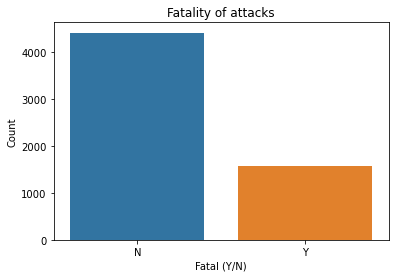

In [23]:
hist = sns.countplot('Fatal (Y/N)', data= df1) # Looks better using seaborn
hist.set_title( 'Fatality of attacks')
hist.set_ylabel('Count')


## Gender distribution of attacks

/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


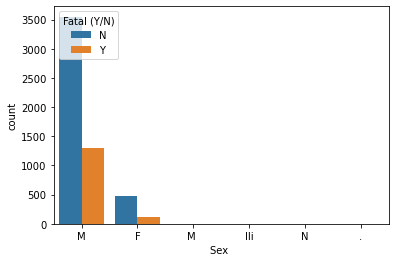

In [24]:
gender = sns.countplot(df1['Sex '], hue = 'Fatal (Y/N)', data = df1)

In [25]:
df1['Sex '] = df1['Sex '].astype(str)
df1['Sex '] = df1['Sex '].apply(no_spaces)
df1['Sex '].value_counts()

M      4853
F       600
nan     531
lli       1
N         1
.         1
Name: Sex , dtype: int64

In [26]:
df1.loc[df1['Sex '] == 'lli','Sex '] = 'M' #Brian Kang is a male

In [27]:
df1 = df1[(df1['Sex ']=='M')|(df1['Sex ']=='F')]

/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

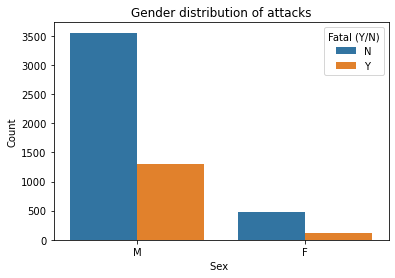

In [28]:
gender = sns.countplot(df1['Sex '], hue = 'Fatal (Y/N)', data = df1)
gender.set_title('Gender distribution of attacks')
gender.set_ylabel('Count')

## Type of attack

/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Fatality by Type')

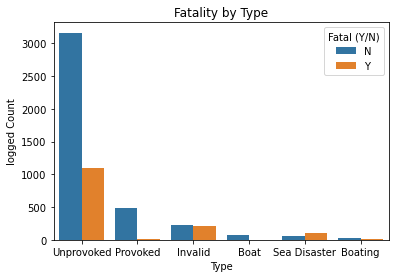

In [29]:
type_graph = sns.countplot('Type',hue ='Fatal (Y/N)', data = df1)
type_graph.set_ylabel('logged Count')
type_graph.set_title('Fatality by Type')

## Activity 

In [30]:
df1['Activity'].value_counts()

Surfing                                         899
Swimming                                        801
Fishing                                         321
Spearfishing                                    306
Bathing                                         146
                                               ... 
Washing cooking pans                              1
Spearfishing / freediving                         1
Attempted to return injured shark to the sea      1
Air disaster                                      1
4 men were bathing                                1
Name: Activity, Length: 1340, dtype: int64

In [31]:
df1['Activity']=df1['Activity'].astype(str)
lower = lambda x: x.lower()
df1['Activity']=df1['Activity'].apply(lower)

In [32]:
# Capture different activities
for i in range(len(df1['Activity'])): 
    
    if 'surfing' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'surfing', inplace = True)
    elif 'surfing,' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'surfing', inplace = True)
    elif 'surfboard' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'surfing', inplace = True)
    elif 'swimming' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'swimming', inplace = True)
    elif 'swimming,' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'swimming', inplace = True)
    elif 'bathing' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'swimming', inplace = True)
    elif 'floating' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'swimming', inplace = True)
    elif 'water' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'swimming', inplace = True)
    elif 'fishing' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'fishing', inplace = True)
    elif 'fishing,' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'fishing', inplace = True)
    elif 'wading' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'wading', inplace = True)
    elif 'standing' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'wading', inplace = True)
    elif 'boogie' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'body boarding', inplace = True)
    elif 'body-boarding' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'body boarding', inplace = True)
    elif 'bodyboarding' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'body boarding', inplace = True)
    elif 'spearfishing' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'spearfishing', inplace = True)
    elif 'spearfishing,' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'spearfishing', inplace = True)
    elif 'diving' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'diving', inplace = True)
    elif 'freediving' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'diving', inplace = True)
    elif 'skindiving' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'diving', inplace = True)
    elif 'snorkeling' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'snorkeling', inplace = True)
    elif 'surf-skiing' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'surf skiing', inplace = True)
    elif 'skiing' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'surf skiing', inplace = True)
    elif 'canoeing' in df1['Activity'].iloc[i].split():
        df1.replace(to_replace = df1['Activity'].iloc[i],value = 'kayaking', inplace = True)

In [33]:
activity_counts = df1['Activity'].value_counts() #Create df with the value counts for each activity
activity_count_list = activity_counts[activity_counts > 10].index.tolist() #Creates a list with activities which appear more than 10 times
df1 = df1[df1['Activity'].isin(activity_count_list)] # selecting those which are in the list
df1 = df1[df1['Activity'] != 'sea disaster']

Text(0.5, 1.0, 'Activity')

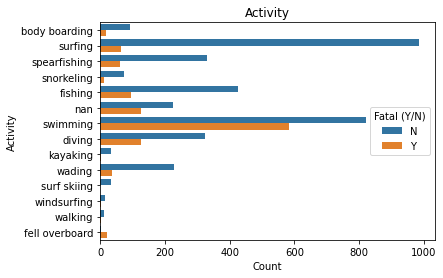

In [34]:
activity = sns.countplot(y='Activity',hue = 'Fatal (Y/N)', data = df1)
activity.set_xlabel('Count')
activity.set_title('Activity')

## Locations/Countries

* Which is the deadliest country?
* Which is the country with most attacks?
* Dead rate per country?

In [35]:
fatal = pd.get_dummies(df1['Fatal (Y/N)'], drop_first = True)
# df1.drop('Fatal (Y/N)', axis = 1, inplace = True)
df1 = pd.concat([df1, fatal], axis = 1)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Usa'),
  Text(1, 0, 'Australia'),
  Text(2, 0, 'South Africa'),
  Text(3, 0, 'New Zealand'),
  Text(4, 0, 'Papua New Guinea')])

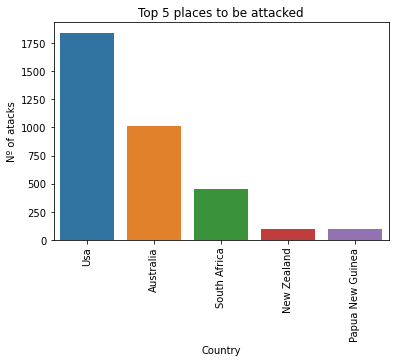

In [36]:
df1['Country']=df1['Country'].astype(str)
title_format = lambda x: x.title()
df1['Country'] = df1['Country'].apply(title_format)
country_attack_count = df1['Country'].value_counts()
subset_countries_att = country_attack_count[:5]
attacks_country = sns.barplot(x=subset_countries_att.index, y=subset_countries_att.values)
attacks_country.set_title('Top 5 places to be attacked')
attacks_country.set_ylabel('Nº of atacks')
attacks_country.set_xlabel('Country')
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'Usa'),
  Text(2, 0, 'South Africa'),
  Text(3, 0, 'Papua New Guinea'),
  Text(4, 0, 'Mexico')])

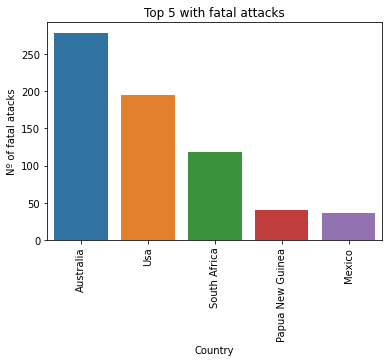

In [37]:
fatals= df1[df1['Y']==1]
count_fata = fatals.Country.value_counts()
subset_fatal = count_fata[:5]
fatal_attacks_country = sns.barplot(x=subset_fatal.index, y=subset_fatal.values)
fatal_attacks_country.set_title('Top 5 with fatal attacks')
fatal_attacks_country.set_ylabel('Nº of fatal atacks')
fatal_attacks_country.set_xlabel('Country')
plt.xticks(rotation=90)



In [38]:
dfFatal = count_fata # Fatal attacks
dfAll_att = country_attack_count #All attacks

In [39]:
merged_df = pd.concat([dfAll_att, dfFatal], axis=1) # Merging both dfs

In [40]:
merged_df.columns = ['Total Attacks', 'Fatal Attacks']

In [41]:
def_mergeddf = merged_df[(merged_df['Total Attacks']>10) & merged_df['Fatal Attacks'] >= 1.0] #Keep data for countries with more than 10 attacks and +1 fatal attack
def_mergeddf['Fatality Rate'] = def_mergeddf['Fatal Attacks']/def_mergeddf['Total Attacks'] # Comupting fatality rate

/var/folders/xn/r9xc8p3151s4yw6tpl5_31mm0000gn/T/ipykernel_72681/2942213718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  def_mergeddf['Fatality Rate'] = def_mergeddf['Fatal Attacks']/def_mergeddf['Total Attacks'] # Comupting fatality rate


In [42]:
sorted_merged = def_mergeddf.sort_values(by ='Fatality Rate', ascending = False) # Sort values by fatality rate

In [43]:
sorted_merged['Fatal Attacks'] = sorted_merged['Fatal Attacks'].astype(np.int64) # Convert fatal attacks into an int
sorted_merged['Fatality Rate'] = sorted_merged['Fatality Rate'].round(2) #Convert fatality rate into a 2 decimal number
sorted_merged

,Total Attacks,Fatal Attacks,Fatality Rate
Vanuatu,11,9,0.82
Hong Kong,21,15,0.71
Greece,17,12,0.71
Costa Rica,11,7,0.64
Croatia,22,13,0.59
Philippines,24,13,0.54
Jamaica,19,10,0.53
Panama,23,12,0.52
Japan,23,12,0.52
Mexico,70,36,0.51


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'Vanuatu'),
  Text(1, 0, 'Hong Kong'),
  Text(2, 0, 'Greece'),
  Text(3, 0, 'Costa Rica'),
  Text(4, 0, 'Croatia'),
  Text(5, 0, 'Philippines'),
  Text(6, 0, 'Jamaica'),
  Text(7, 0, 'Panama'),
  Text(8, 0, 'Japan'),
  Text(9, 0, 'Mexico'),
  Text(10, 0, 'Cuba'),
  Text(11, 0, 'Nan'),
  Text(12, 0, 'New Caledonia'),
  Text(13, 0, 'India'),
  Text(14, 0, 'Venezuela'),
  Text(15, 0, 'Reunion'),
  Text(16, 0, 'Iran'),
  Text(17, 0, 'Mozambique'),
  Text(18, 0, 'Indonesia'),
  Text(19, 0, 'Papua New Guinea'),
  Text(20, 0, 'Brazil'),
  Text(21, 0, 'Solomon Islands'),
  Text(22, 0, 'Egypt'),
  Text(23, 0, 'Fiji'),
  Text(24, 0, 'Italy'),
  Text(25, 0, 'Australia'),
  Text(26, 0, 'Tonga'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'New Zealand'),
  Text(29, 0, 'Spain'),
  Text(30, 0, 'England'),
  Text(31, 0, 'Be

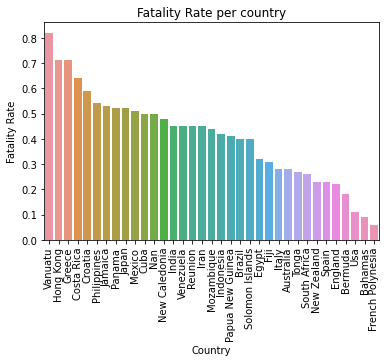

In [45]:
fatality_rate_graph = sns.barplot(x=sorted_merged.index, y=sorted_merged['Fatality Rate'])
fatality_rate_graph.set_title('Fatality Rate per country')
fatality_rate_graph.set_xlabel('Country')
plt.xticks(rotation=90)

## Lastly, let's take a look at the years

In [55]:
df1['Year'].dtype # Float. We need it as an int
df1=df1[~df1['Year'].isna()] #Select with no Nan   

In [59]:
df1.Year=df1.Year.astype(np.int64)

In [108]:
Years_df = df1['Year'].value_counts()
Years_df = pd.DataFrame(Years_df)
Years_df = Years_df.sort_index(ascending=False)[:100]


([<matplotlib.axis.XTick at 0x15706c700>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

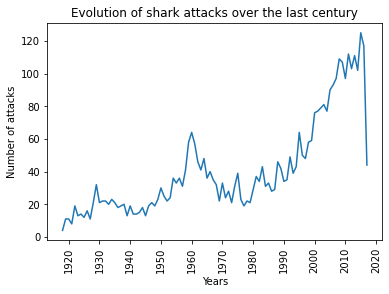

In [122]:
plt.plot(Years_df.index,Years_df.values)
plt.ylabel('Number of attacks')
plt.xlabel('Years')
plt.title('Evolution of shark attacks over the last century')
plt.xticks([1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020],rotation=90)